<a href="https://colab.research.google.com/github/lilylily1250/portfolio/blob/main/%E3%83%9C%E3%83%83%E3%83%88%E3%81%AE%E5%88%A4%E5%88%A5%EF%BC%88portfolio%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# はじめに

この半年間でデータ分析を学習しました。
そこで学んだ技術を使って、ツイッターアカウントが人間かボットかを分類するモデルを作成し、その分析結果をまとめてみました。

# 解決したい社会問題

近年、生成AIを利用した信憑性の低い情報が拡散されるという問題が深刻化しています。このような状況の中で、人間が執筆した記事とボットによって生成された記事を判別できるモデルを構築し、この問題の解決に貢献したいと考えました。

# 実行環境

パソコン：Windows 10 Home

開発環境：Google Colaboratory

言語：Python

ライブラリ：Matplotlib、pandas、Numpy、seaborn

# 分析の流れ

1. ライブラリのインポート

2. データの確認

3. 学習データとテストデータへの分割

4. 決定木モデル

5. 決定木モデルの評価

6. 【モデルの改善1】ランダムフォレストモデル

7. 【モデルの改善1】ランダムフォレストモデルの評価

8. 【モデルの改善2】ランダムフォレストモデル

9. 【モデルの改善2】ランダムフォレストモデルの評価




## １．ライブラリのインポート

In [68]:
# ライブラリ「pandas」をインポートし、pandasをpdという短い名前で呼び出せるようにする。
import pandas as pd

## ２．データの確認

In [69]:
# 読み込んだデータをpandasのデータフレーム（df）として格納する。
# index_col=0: 読み込むファイルの最初の列（0番目の列）をデータフレームのインデックス（行ラベル）として使用する。
# sep='\t': ファイルがタブ区切り (\t) であることを指定する。通常の CSV（カンマ区切り）ではなく、TSV（タブ区切り）にする。
df = pd.read_csv('/content/train.tsv', index_col=0, sep='\t')

In [70]:
# デフォルトで先頭5行を表示。
df.head()

,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
id,,,,,,,,,,,,,,,
0,0,715,0,0,423,206,150,1,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505
2,0,2151,0,0,1457,1321,1704,1,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073
3,0,439,0,0,691,213,5,0,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228
7,0,28,1,0,285,31,0,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412
12,0,40,0,0,907,60,1013,1,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619


In [71]:
# タプル (行数, 列数) を確認する。
df.shape

(1588, 15)

In [72]:
# pandasデータフレーム（df）の概要情報を表示する。
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 0 to 3175
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bot                       1588 non-null   int64  
 1   statuses_count            1588 non-null   int64  
 2   default_profile           1588 non-null   int64  
 3   default_profile_image     1588 non-null   int64  
 4   friends_count             1588 non-null   int64  
 5   followers_count           1588 non-null   int64  
 6   favourites_count          1588 non-null   int64  
 7   geo_enabled               1588 non-null   int64  
 8   listed_count              1588 non-null   int64  
 9   account_age_hours         1588 non-null   int64  
 10  diversity                 1588 non-null   float64
 11  mean_mins_between_tweets  1588 non-null   float64
 12  mean_tweet_length         1588 non-null   float64
 13  mean_retweets             1588 non-null   float64
 14  reply_rate   

このデータは欠損値がないことが確認された。

可視化したデータ

array([[<Axes: title={'center': 'bot'}>,
        <Axes: title={'center': 'statuses_count'}>,
        <Axes: title={'center': 'default_profile'}>,
        <Axes: title={'center': 'default_profile_image'}>],
       [<Axes: title={'center': 'friends_count'}>,
        <Axes: title={'center': 'followers_count'}>,
        <Axes: title={'center': 'favourites_count'}>,
        <Axes: title={'center': 'geo_enabled'}>],
       [<Axes: title={'center': 'listed_count'}>,
        <Axes: title={'center': 'account_age_hours'}>,
        <Axes: title={'center': 'diversity'}>,
        <Axes: title={'center': 'mean_mins_between_tweets'}>],
       [<Axes: title={'center': 'mean_tweet_length'}>,
        <Axes: title={'center': 'mean_retweets'}>,
        <Axes: title={'center': 'reply_rate'}>, <Axes: >]], dtype=object)

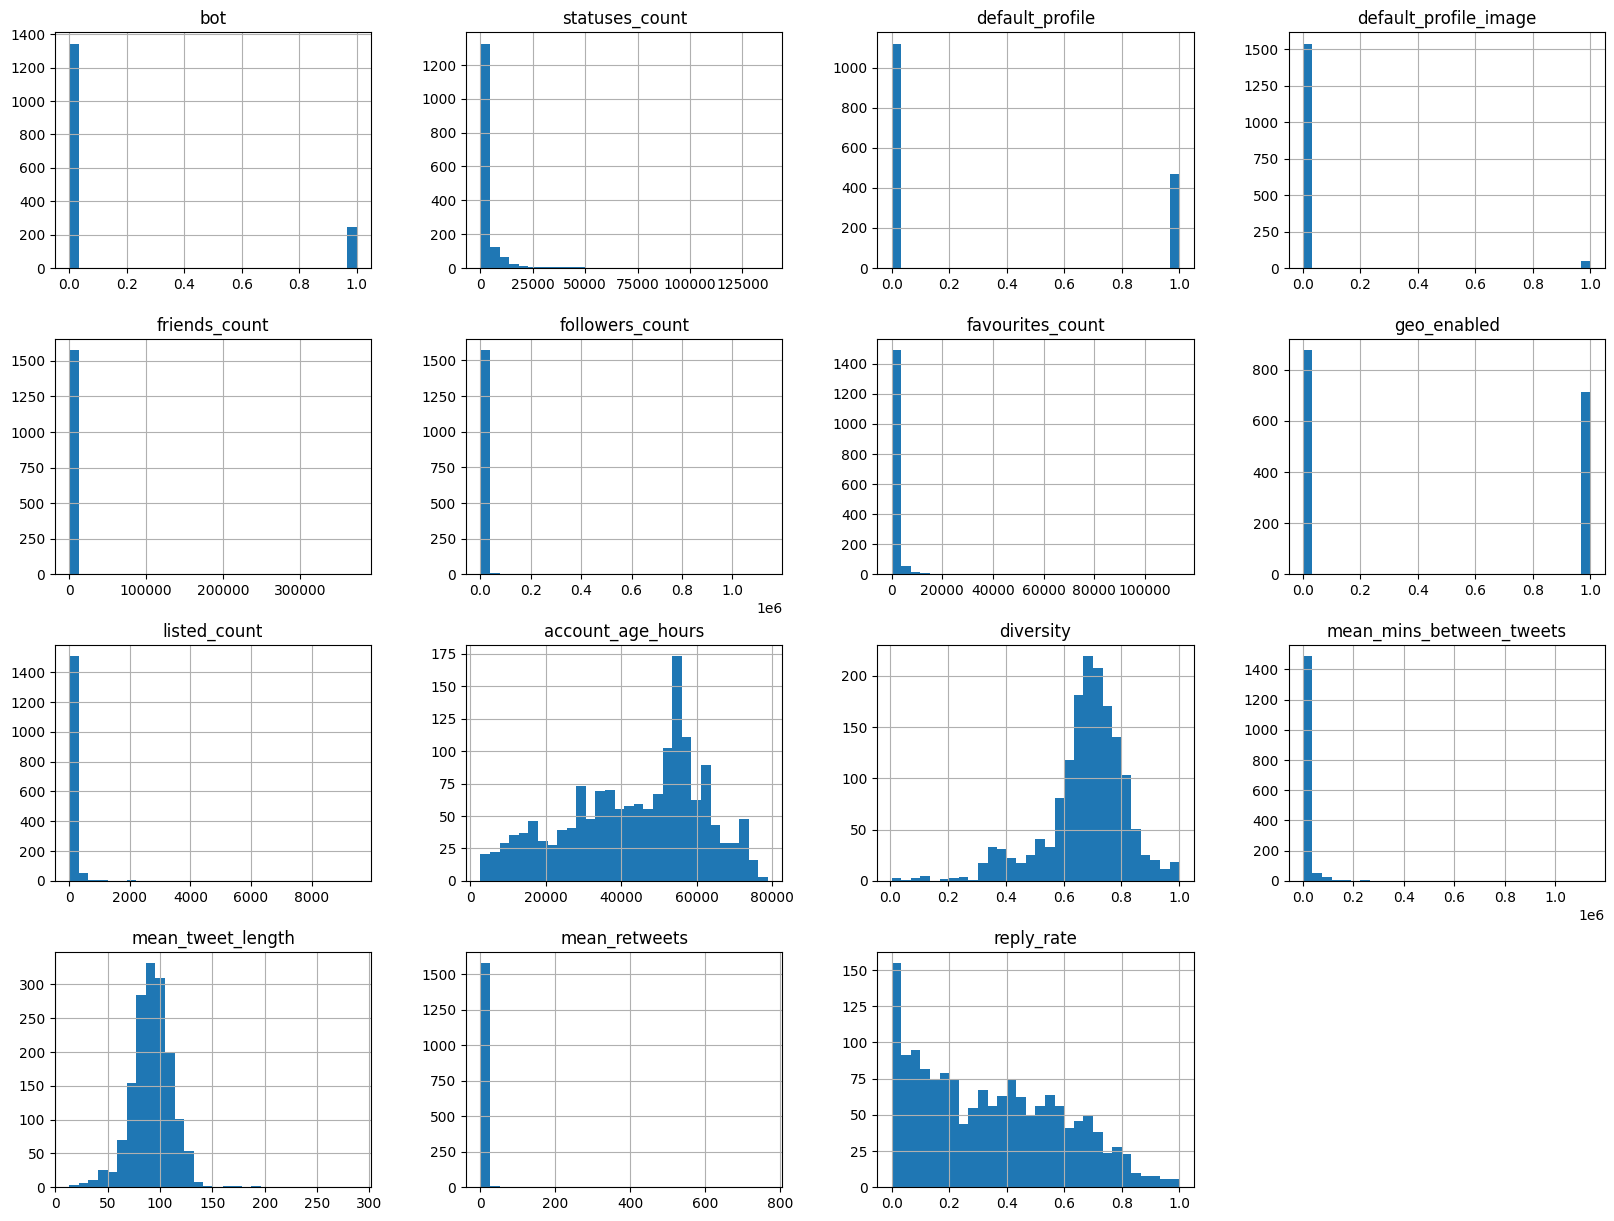

In [40]:
# pandasデータフレームdfの数値列（floatやint型の列）についてヒストグラム（度数分布図）を描画する。
df.hist(figsize=(20, 15), bins=30)

分析したデータから得られた情報

・ボット（１）のデータ数がボットでない（０）のデータ数に比べ、約６分の１しかない。

## ３．学習データとテストデータへの分割

In [41]:
# pandasのデータフレームdfから特定の列（bot列）を削除し、残りのデータをNumPy配列に変換して変数Xに格納する。
X = df.drop(columns=['bot']).to_numpy()

In [42]:
# pandasデータフレームdfのbot列を抽出し、それをNumPy配列（numpy.ndarray型）に変換して、変数yに格納する。
y = df['bot'].to_numpy()

In [43]:
# scikit-learn（機械学習ライブラリ）のmodel_selectionモジュールからtrain_test_split関数をインポートする。
from sklearn.model_selection import train_test_split

In [44]:
# X（特徴量データ）とy（ラベルデータ）を訓練用データ（X_train, y_train）とテスト用データ（X_test, y_test）に分割する処理を行う。
# train.csv から 訓練用データ（X_train, y_train）とテスト用データ（X_test, y_test）を作成する。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
# 訓練用データおよびテスト用データの形状（shape）を表示する。
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1111, 14) (477, 14) (1111,) (477,)


## 4．決定木モデル

今回の「人間かボットか」のような、データがどのカテゴリーに分類できるか、を予測したい場合に適した決定木モデルの構築を試みる。

In [46]:
# scikit-learnライブラリのtreeモジュールからDecisionTreeClassifierクラスをインポートする。
from sklearn.tree import DecisionTreeClassifier

In [47]:
# DecisionTreeClassifierは、scikit-learnライブラリのtreeモジュールに含まれるクラスで、分類問題を解くための決定木アルゴリズムを実装している。
# random_state=0を指定すると、シード値として0を使うことになる。これにより、同じコードを実行するたびに同じ結果を得ることができる。
model = DecisionTreeClassifier(random_state=0)

In [48]:
# 決定木モデルを訓練する処理を行う。訓練データX_trainとその対応するラベルy_trainを使って、モデルを学習させる。
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## 5．決定木モデルの評価

In [49]:
# trainデータに対する予測結果を表示する。
y_pred_train = model.predict(X_train)

In [50]:
# モデル評価を行うために scikit-learn の metrics モジュールから classification_report 関数をインポート
from sklearn.metrics import classification_report

In [51]:
# 訓練データ（y_train）に対する予測結果（y_pred_train）の評価を出力する。
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       949
           1       1.00      1.00      1.00       162

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111



In [52]:
# 訓練されたモデルを使って、テストデータ（X_test）に対する予測を行い、その結果をy_predに格納する。
y_pred = model.predict(X_test)

In [53]:
# テストデータ（X_test）に対するモデルの予測結果を表示。
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
# テストデータにおける正解ラベルの配列。
# モデルが予測したクラスラベル（y_pred）と比較するために使用する。これにより、モデルの予測がどれだけ正確であるかを評価できる。
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
# 分類モデルの性能を評価するために、classification_report関数を使って、テストデータ（y_test)に対する予測結果(y_pred)の評価指標を表示する。
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       396
           1       0.61      0.63      0.62        81

    accuracy                           0.87       477
   macro avg       0.77      0.77      0.77       477
weighted avg       0.87      0.87      0.87       477



ボット＝１であり、F値は０・６2と低い。また、正解率も０．８７と低く過学習をしている。

## 6.【モデルの改善1】ランダムフォレストモデル

過学習を防ぎながらモデルの精度を向上させるために、ランダムフォレスト（複数のモデルを組み合わせるアンサンブル学習）の手法を用いる。

In [56]:
# scikit-learn の ensemble モジュールから RandomForestClassifier というクラスをインポート
from sklearn.ensemble import RandomForestClassifier

In [57]:
# 再現性のあるランダムフォレストモデルを作成し、変数 model_rf に格納
model_rf = RandomForestClassifier(random_state=0)

In [58]:
# ランダムフォレストモデル（model_rf）を訓練する処理を行う。
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## 7．【モデルの改善1】ランダムフォレストモデルの評価

In [59]:
# trainデータに対する予測結果を表示する。
y_pred_train = model_rf.predict(X_train)

In [60]:
# モデルが訓練データに対してどの程度正確に予測できたかを示す。
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       949
           1       1.00      1.00      1.00       162

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111



In [61]:
# 訓練されたモデルを使って、テストデータ（X_test）に対する予測を行い、その結果をy_predに格納する。
y_pred = model_rf.predict(X_test)

In [62]:
# 分類モデルの性能を評価するために、classification_report関数を使って、テストデータに対する予測結果の評価指標を表示する。
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       396
           1       0.93      0.47      0.62        81

    accuracy                           0.90       477
   macro avg       0.91      0.73      0.78       477
weighted avg       0.91      0.90      0.89       477



ボット＝１であり、F値は０・６2と低い。また、正解率も０．90と決定木モデルに比べると少し改善されたが、学習データに比べると低く過学習をしている。

##　8.【モデルの改善2】ランダムフォレストモデル

クラスの不均衡を考慮し、過学習を抑制するためのハイパーパラメータを設定したランダムフォレストモデルを作成し、そのモデルを訓練データで学習させて、予測ができる状態にする。

In [63]:
# RandomForestClassifierにハイパーパラメータを指定して機械学習モデルを訓練する。
# ランダムフォレストにおける決定木の数を指定する。ここでは 150 本の決定木を使用する。
# 各決定木の最大の深さを指定する。ここでは、各木の深さが最大 5 に制限する。
# クラスの不均衡を考慮し、少数派のクラス（ボット）をより重視して学習するようにする。
# モデルの結果が再現可能になるようにシード値を設定する。
model_rf2 = RandomForestClassifier(n_estimators = 150, max_depth = 5,class_weight = "balanced", random_state = 0)
model_rf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=150,
                       random_state=0)

##　9.【モデルの改善2】ランダムフォレストモデルの評価


In [64]:
# trainデータに対する予測結果を表示する。
y_pred_train = model_rf2.predict(X_train)

In [65]:
# 分類モデルの性能を評価するために、classification_report関数を使って、学習データに対する予測結果の評価指標を表示する。
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       949
           1       0.81      0.85      0.83       162

    accuracy                           0.95      1111
   macro avg       0.89      0.91      0.90      1111
weighted avg       0.95      0.95      0.95      1111



In [66]:
# 訓練されたモデルを使って、テストデータ（X_test）に対する予測を行い、その結果をy_predに格納する。
y_pred = model_rf2.predict(X_test)

In [67]:
# 分類モデルの性能を評価するために、classification_report関数を使って、学習データに対する予測結果の評価指標を表示する。
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       396
           1       0.72      0.65      0.68        81

    accuracy                           0.90       477
   macro avg       0.82      0.80      0.81       477
weighted avg       0.89      0.90      0.90       477



テストデータのボット＝１のF値は０．６８に改善されたが、依然として低い。今後改善する必要がある。

# 課題

(1)
今回、人間が執筆した記事とボットによって生成された記事を判別できるようにするために、決定木モデルの構築を試みた。決定木モデルではF値が低く、過学習が起こっていた。改善のため、ランダムフォレストモデルを構築したところ、決定木モデルよりもF値が改善された。しかし、依然としてボット＝１のF値が低いため、今後さらに改善する必要がある。

(2)
どのようなデータがボットなのかを今後分析する必要がある。

# まとめ

今回使用したデータはボットのデータ数がボットでないデータ数に比べ、約６分の１しかなかった。偏りのあるデータをscikit-learnのランダムフォレストでクラス分類を行う際はclass weight を設定するなど、工夫する必要がある。
